In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist
import scipy
import statsmodels.formula.api as smf

In [2]:
# Settings
sns.set()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)
pd.options.display.float_format= '{:.2f}'.format

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Variables

title_size = 16

In [4]:
customers = pd.read_csv('Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Initial questions:
### Data Validation
1) How many records and columns do the dataset have?

2) What types of data do we have in the dataset?
3) How many records do we have for each types?
4) What is the ratio of values at 0?
5) What is the ratio of unique values?

### Null Values

6) Hoy many null values do we have? how many for each variable? 

7) What is the porportion of null values of each variable?

In [5]:
# 1- How many records and columns do the dataset have?
print('The dataset has {} records and {} columns'.format(customers.shape[0],customers.shape[1]))

The dataset has 2000 records and 8 columns


In [6]:
# 2 - What types of data do we have in the dataset?
customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [7]:
#3- How many records do we have for each types?
customers.dtypes.value_counts()

int64     6
object    2
dtype: int64

In [8]:
#4- What is the ratio of values at 0?
def Zerovalues(df):
    d = {'TotalRecord': df.shape[0], '#Zeros':0, '%Zeros':0}
    y = pd.DataFrame(d, index= df.columns)
     
    for c  in df.columns:
        y.loc[c,"#Zeros"] = len(df[df[c]==0])
        y.loc[c,"%Zeros"] = round((y.loc[c,"#Zeros"] / y.loc[c,"TotalRecord"] ),2) * 100
    return y[y["#Zeros"]>0]

Zerovalues(df=customers)

,TotalRecord,#Zeros,%Zeros
Age,2000,24,1
Annual Income ($),2000,2,0
Spending Score (1-100),2000,2,0
Work Experience,2000,431,22


In [9]:
#5- What is the ratio of unique values?

def UniqueRate(data,initialColumn):
    
  d = pd.DataFrame(columns=("UniqueValue","UniqueRate"),index=data.columns)
  x = data.columns

  for i in data.columns:
    d.loc[i,"UniqueValue"]=data[i].nunique()
    #print(x[i])

  d["UniqueRate"]= d["UniqueValue"] / data.shape[0]
  d["UniqueRate"] = d["UniqueRate"].astype(float)
  d["UniqueRate"] = round(d["UniqueRate"],3)
  return d.sort_values(by="UniqueValue",ascending=False)

UniqueRate(customers,0)

,UniqueValue,UniqueRate
CustomerID,2000,1.00
Annual Income ($),1786,0.89
Spending Score (1-100),101,0.05
Age,100,0.05
Work Experience,18,0.01
Profession,9,0.00
Family Size,9,0.00
Gender,2,0.00


In [10]:
customers.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [11]:
# 6 - Hoy many null values do we have? how many for each variable?

def NullValues(dataSet):
    ''' Analize null values '''
    x = dataSet.isna().sum()
    if len(x[x>0])>0:
        d = {'NullRecord': x[x>0], 'TotalRecord': dataSet.shape[0]}
        y = pd.DataFrame(d)
        #y["CompleteRecord"] = y["TotalRecord"] - y["NullRecord"]
        y["Empty %"] = round(y['NullRecord']/y['TotalRecord'],2) 
    return y.sort_values("NullRecord",ascending=True)

NullValues(customers)

,NullRecord,TotalRecord,Empty %
Profession,35,2000,0.02


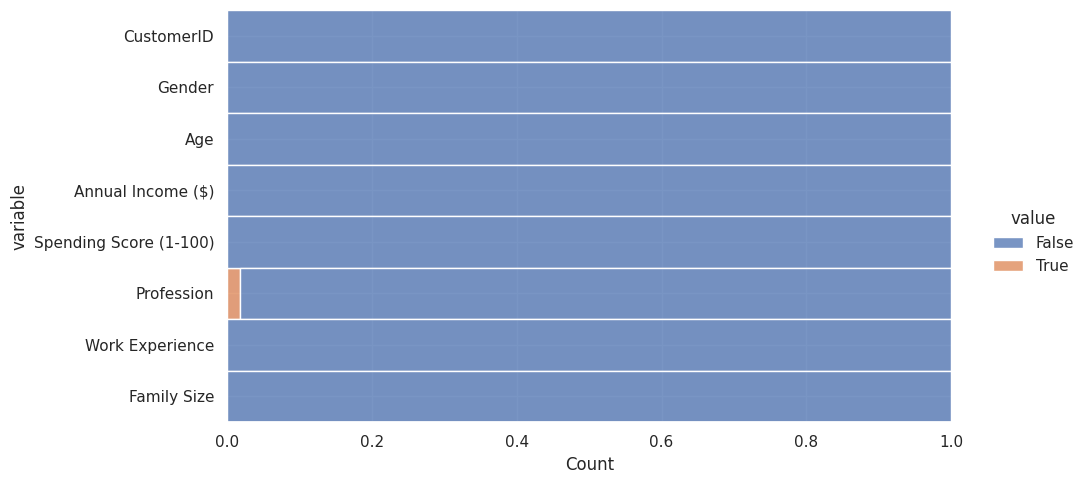

In [12]:
# 7 - What is the porportion of null values of each variable?
(
    customers
    .isnull()
    .melt()
    .pipe(
        lambda df_null:(sns.displot(
                   data=df_null,
                   y='variable',
                   hue='value',
                   multiple='fill',
                   aspect=2)
                        )
    )
)
plt.show()

In [13]:
customers['Profession'].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

In [14]:
customers['Age'].unique()


array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41,
       16, 76, 62, 80,  1,  0, 86, 79, 83, 95, 93, 78, 15,  6, 84,  4, 91,
       14, 92, 77, 89, 12,  7, 94, 96, 74, 85, 73,  9, 10, 11, 17, 90, 61,
       13, 72,  5, 75, 99, 88, 82,  8, 87,  3, 97, 81, 98,  2, 71])

In [15]:
customers.query("Age < 16")

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
210,211,Female,1,57000,93,Engineer,1,2
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
229,230,Male,15,94000,30,Healthcare,7,2
230,231,Female,6,93000,53,Lawyer,8,2
...,...,...,...,...,...,...,...,...
1974,1975,Female,14,153145,59,Healthcare,8,6
1979,1980,Male,0,165321,93,Doctor,8,1
1980,1981,Female,10,86925,76,Artist,7,2
1984,1985,Female,2,153622,51,Lawyer,6,6


### Conclusions

In [16]:
#1 - Replace null values with "No response"

customers['Profession'] = customers['Profession'].fillna("No Response")

In [17]:
#2 - Changing types from "object" to "category"

customers = (
    customers.astype({
        'Gender': 'category',
        'Profession': 'category',
        })
) 

In [18]:
#3 - Eliminate "CustomerID" Column

customers.drop(columns='CustomerID',inplace=True)

In [19]:
# 4 - I decided to eliminate all the customers under 16 because it doesn't make sense that they have income, profession and spending score

custoemrs = customers.query("Age > 16")

## Univariate Analysis

### Exploring categorical variables

In [20]:
df_categories=customers.select_dtypes('category')
categories=customers.select_dtypes('category').columns

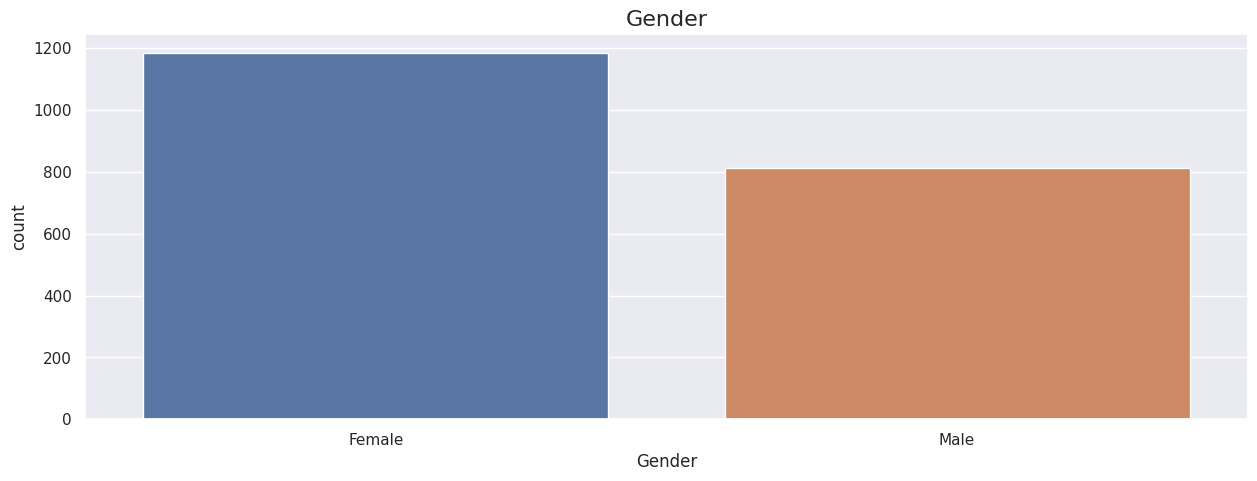

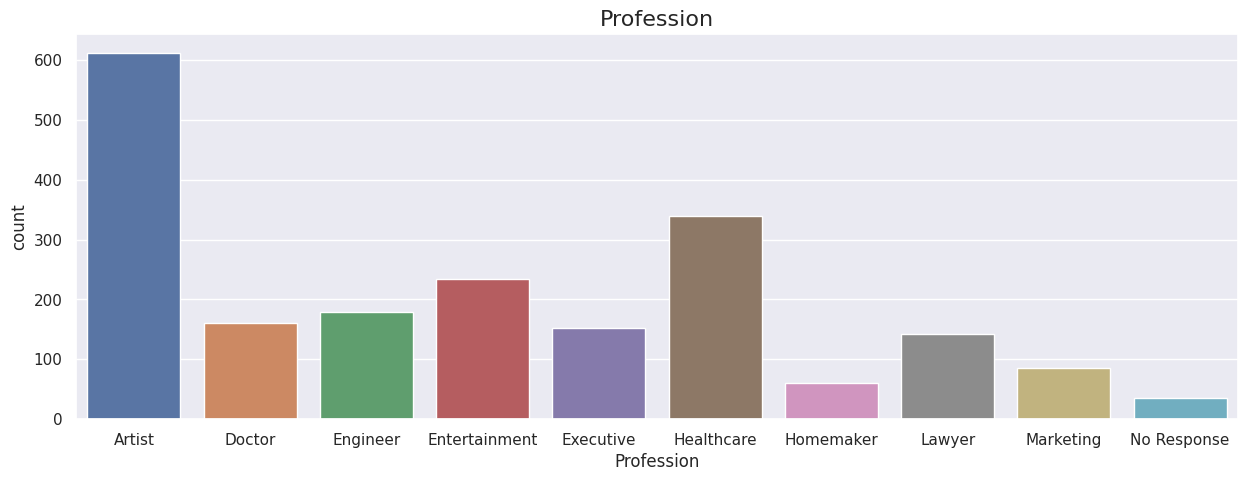

In [21]:
for i in df_categories:
    plt.figure(figsize=(15,5))
    plt.title(i,fontsize=16)
    plt.rcParams['figure.facecolor'] = 'White'
    sns.countplot(x=df_categories[i])
    plt.show()

In [22]:
customers.describe(include='category')

,Gender,Profession
count,2000,2000
unique,2,10
top,Female,Artist
freq,1186,612


### Exploring numerical variables

In [23]:
df_desc=customers.describe().transpose()
df_desc['inter_range'] = df_desc['75%'] - df_desc['25%']
df_desc['range+'] = df_desc['mean'] + df_desc['std']
df_desc['range-'] = df_desc['mean'] - df_desc['std']
df_desc

,count,mean,std,min,25%,50%,75%,max,inter_range,range+,range-
Age,2000.00,48.96,28.43,0.00,25.00,48.00,73.00,99.00,48.00,77.39,20.53
Annual Income ($),2000.00,110731.82,45739.54,0.00,74572.00,110045.00,149092.75,189974.00,74520.75,156471.36,64992.28
Spending Score (1-100),2000.00,50.96,27.93,0.00,28.00,50.00,75.00,100.00,47.00,78.90,23.03
Work Experience,2000.00,4.10,3.92,0.00,1.00,3.00,7.00,17.00,6.00,8.02,0.18
Family Size,2000.00,3.77,1.97,1.00,2.00,4.00,5.00,9.00,3.00,5.74,1.80


In [24]:
numeric_columns = customers.select_dtypes(include=np.number).columns[1:]

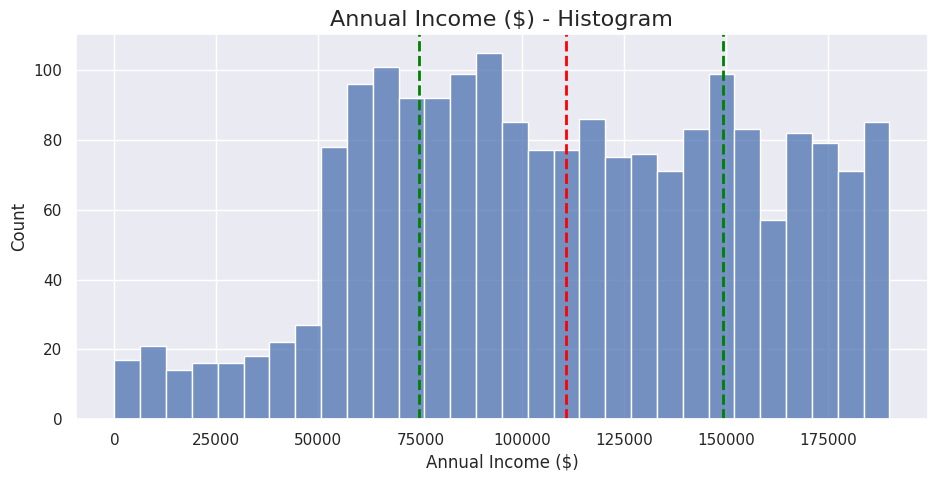

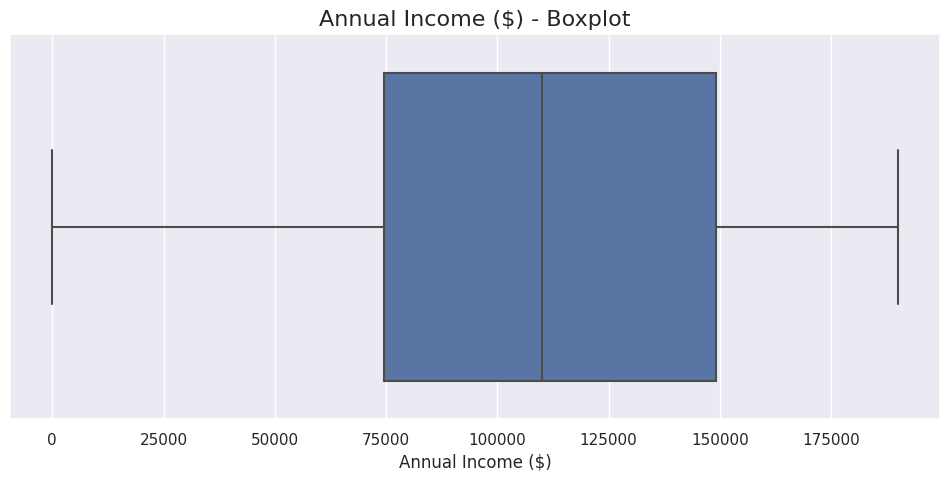

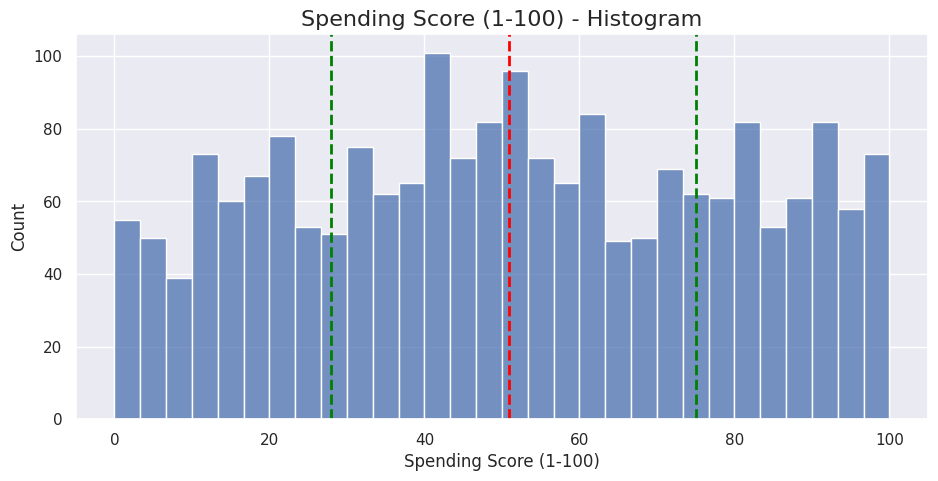

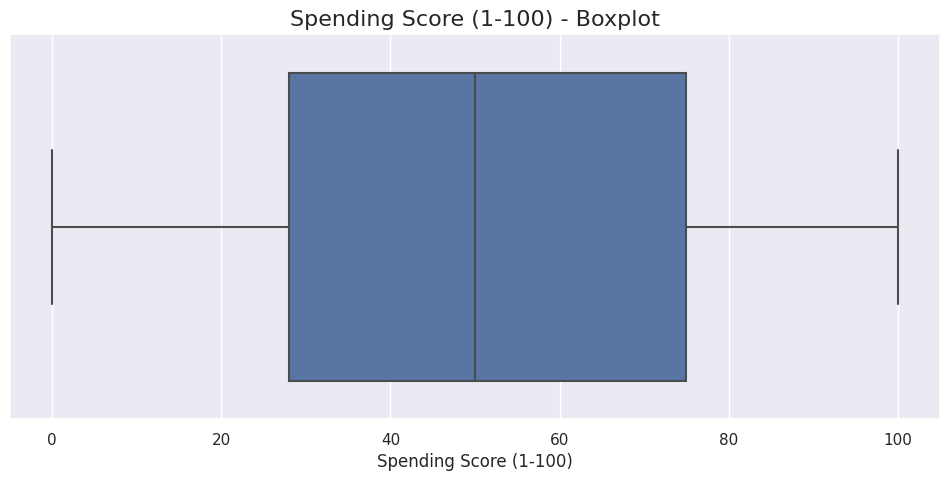

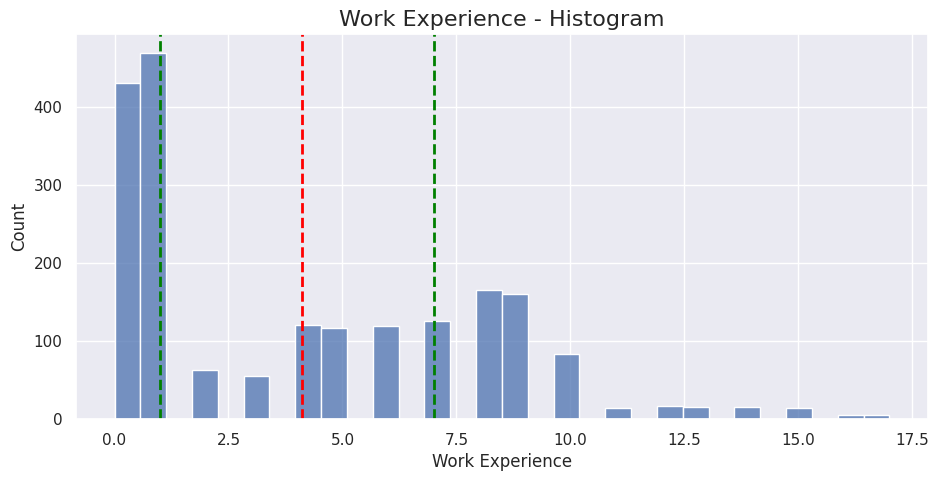

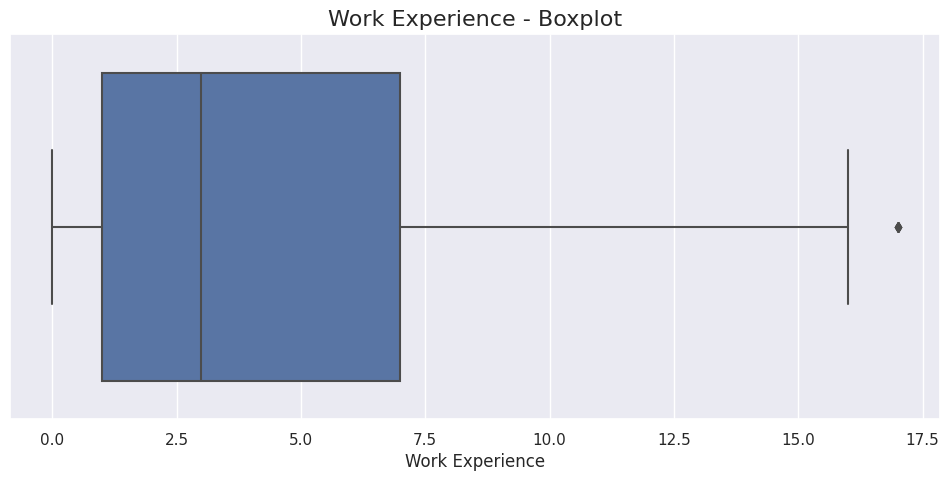

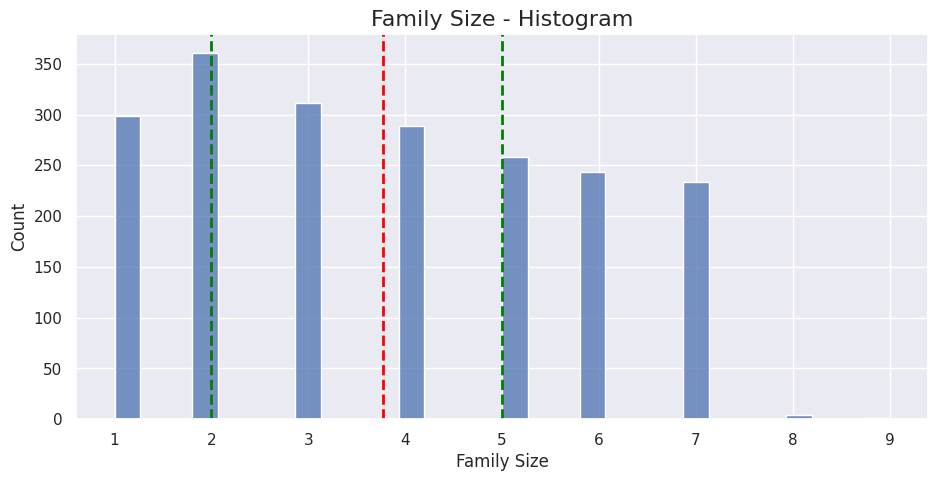

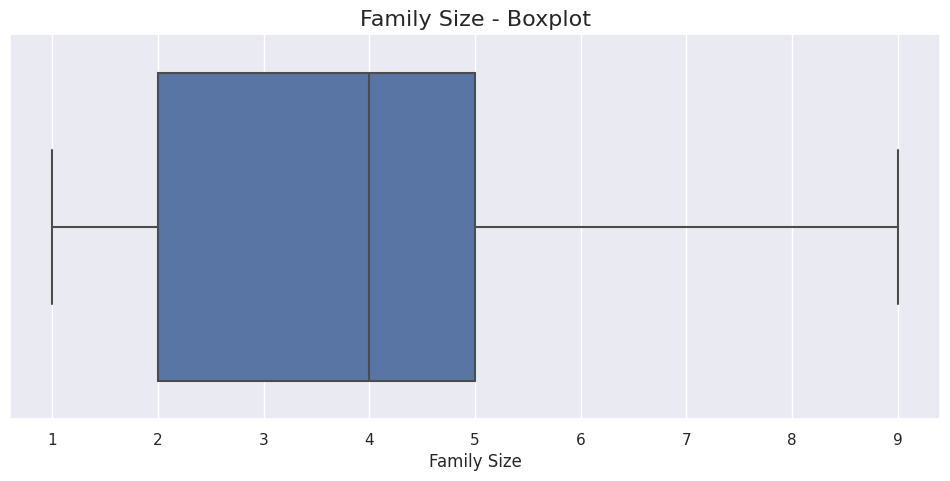

In [25]:
for column in numeric_columns:
    plt.figure(figsize=(11,5))
    sns.histplot(
        data=customers,
        x=column,
        bins=30
    )
    plt.axvline(
        x=customers[column].mean(),
        color='red',
        linestyle='--',
        linewidth=2)
    plt.axvline(
    x= customers[column].quantile(q=0.25),
        color='green',
        linestyle='--',
        linewidth=2
    )
    plt.axvline(
    x= customers[column].quantile(q=0.75),
        color='green',
        linestyle='--',
        linewidth=2
    )
    plt.title(column+' - Histogram',fontsize=16)
    plt.show()
    plt.figure(figsize=(12,5))
    sns.boxplot(data=customers,
                x=column)
    plt.title(column+' - Boxplot',fontsize=16)
    plt.show()

## Cummulative and density functions 

In [26]:
class Empdist():
    def CDF(df,column):
        cdf=empiricaldist.Cdf.from_seq(
            df[column],
            normalize=True
        )
        cdf.plot()
        plt.title(f'{column} - Cummulative function',fontsize=16)
        plt.show()
    
    def PMF(df,column):
        pmf = empiricaldist.Pmf.from_seq(
            df[column],
            normalize=True
        )
        pmf.bar()
        plt.title(f'{column} Histogram',fontsize=16)
        plt.show()

### Cummulative function

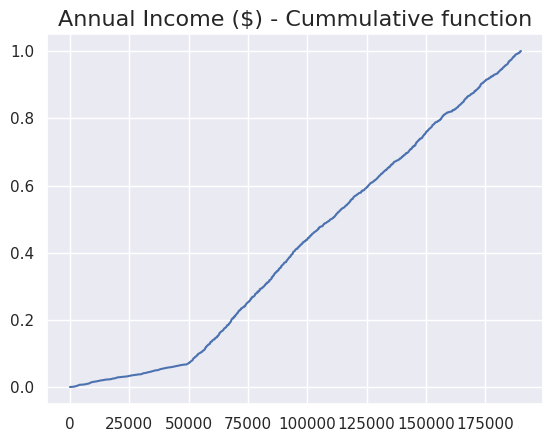

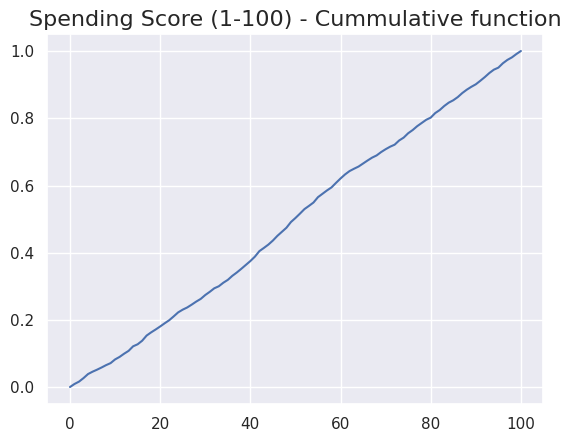

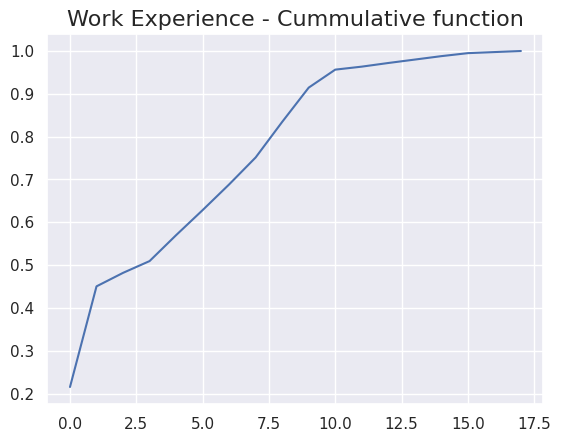

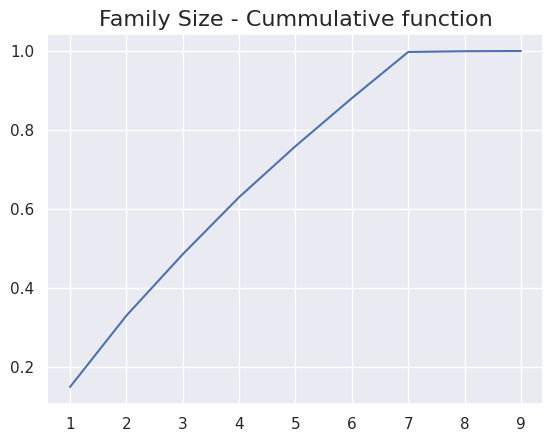

In [27]:
for i in numeric_columns:
    Empdist.CDF(df=customers,column=i)

### Probability Function

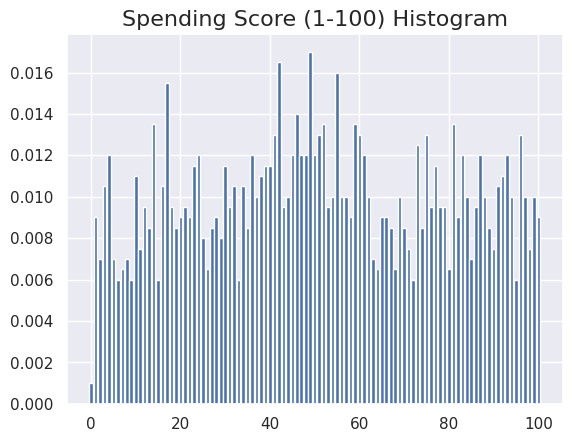

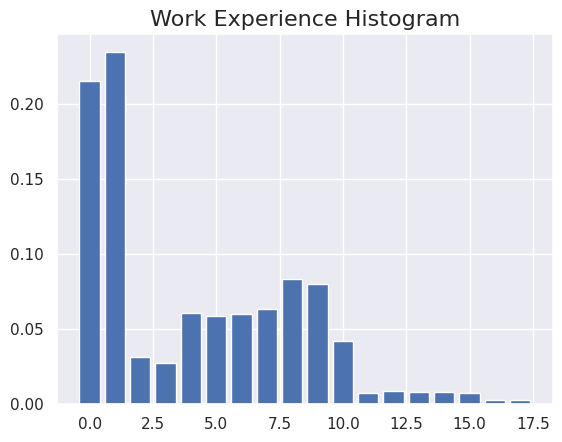

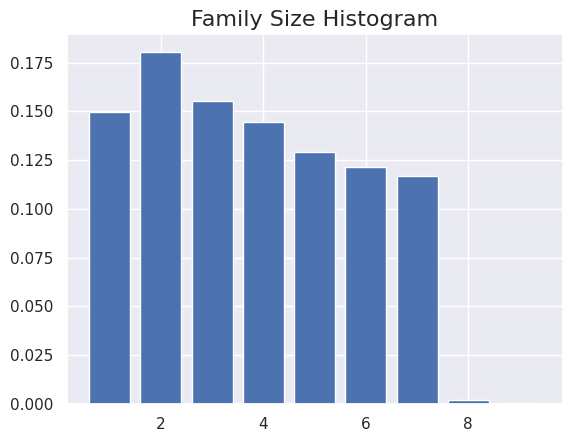

In [28]:
for i in numeric_columns[1:]:
    Empdist.PMF(df=customers,column=i)

## Cumulative and density functions - Real vs Normalize 

### The objective is compare the distribution of each variables and compare it with the distirbution it should follow if the data behaibs as a normal distribution

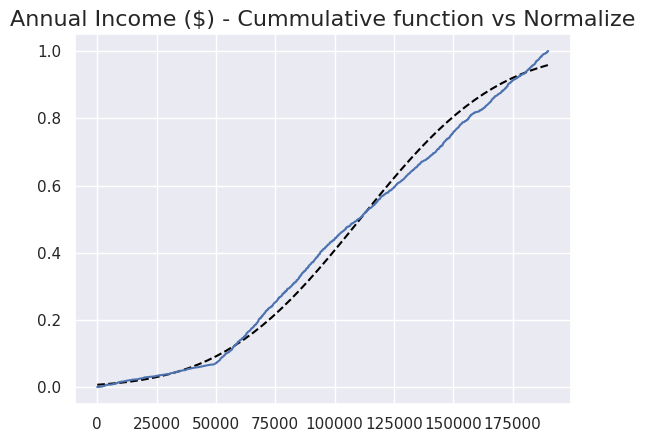

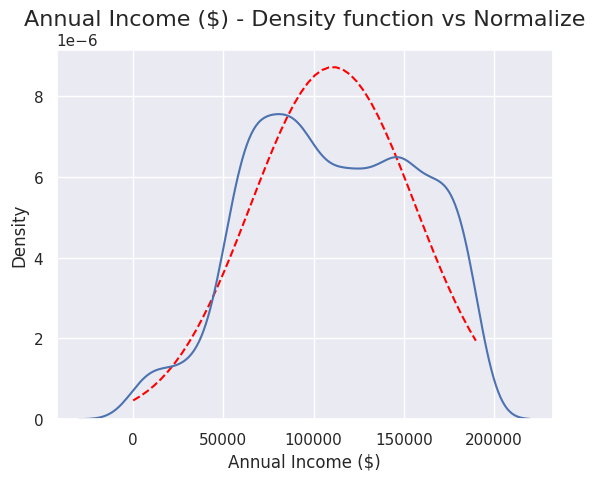

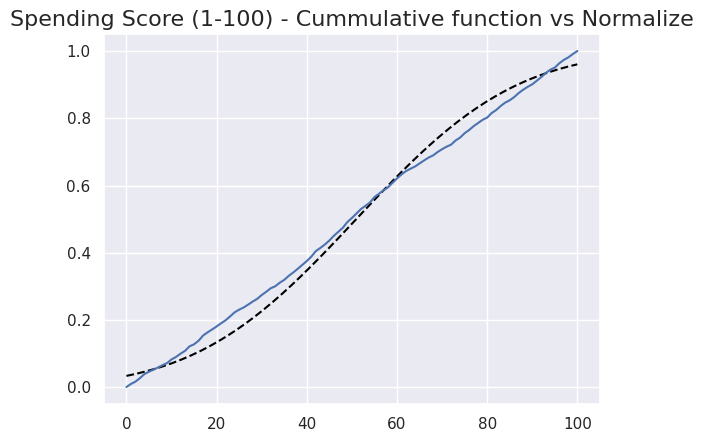

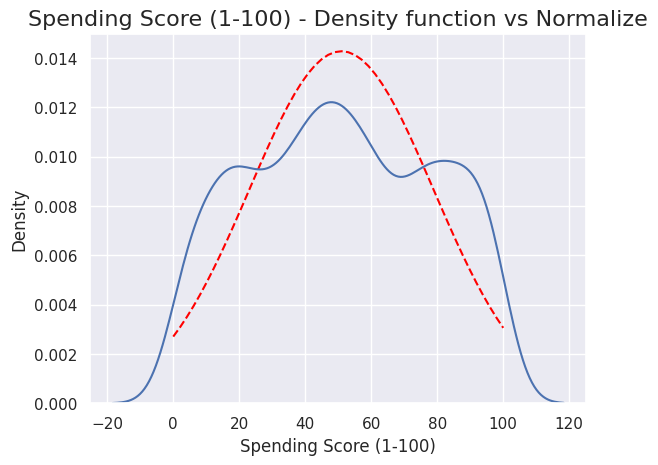

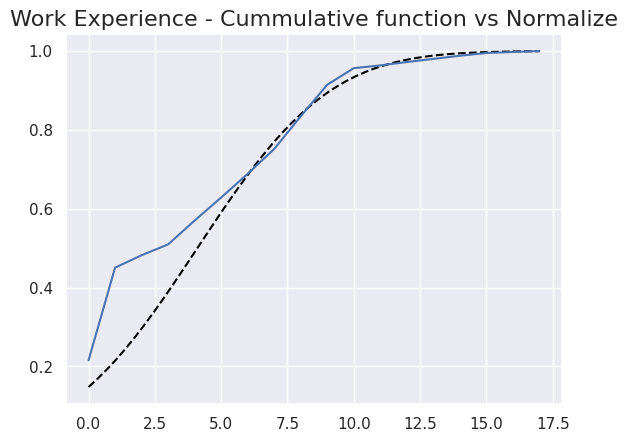

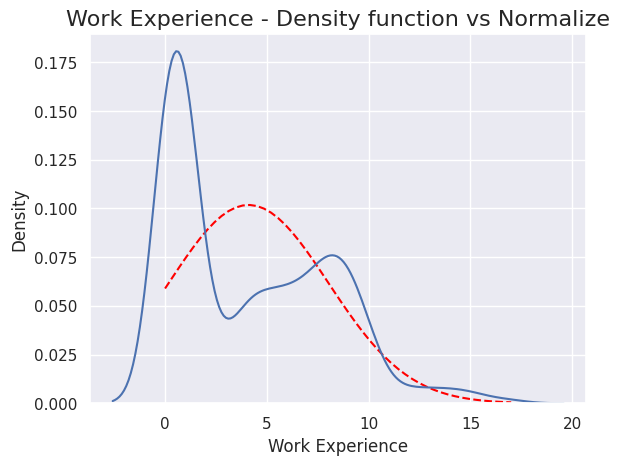

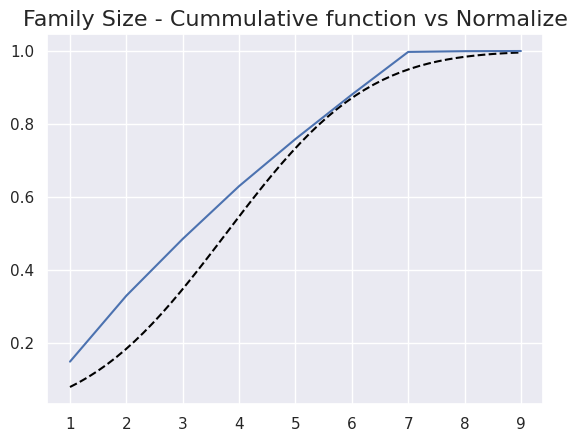

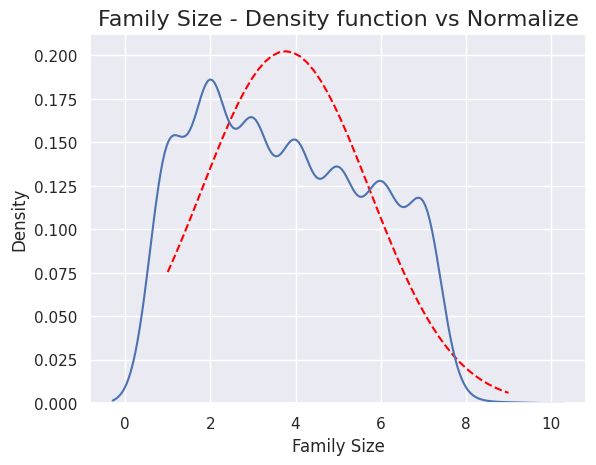

In [29]:
def NormVSReal(df,columns):
    for column in columns:
        stats = df[column].describe()
        xs = np.linspace(stats['min'],stats['max'])
        ys= scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)
        zs= scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)
        
        
        plt.plot(xs,ys,color='black',linestyle='dashed')
        empiricaldist.Cdf.from_seq(
            df[column],
            normalize=True
        ).plot()
        plt.title(f'{column} - Cummulative function vs Normalize',fontsize=16)
        plt.show()
        
        plt.plot(xs,zs,color='red',linestyle='dashed')

        sns.kdeplot(
            data=df,
            x=column
        )

        plt.title(f'{column} - Density function vs Normalize',fontsize=16)
        plt.show()

NormVSReal(df=customers,columns=numeric_columns)

# Bivariate analysis

### Relationship between variables

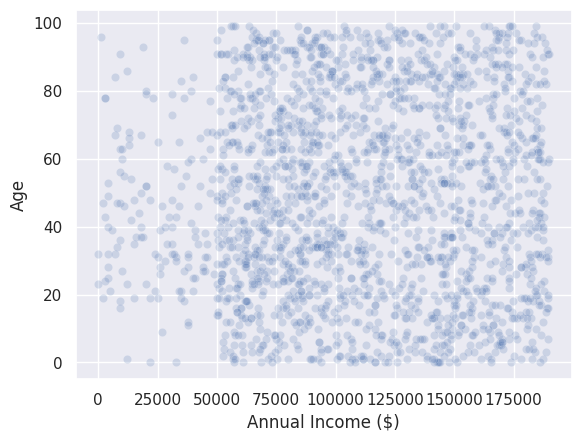

In [30]:
sns.scatterplot(
    data=customers,
    x='Annual Income ($)',
    y='Age',
    alpha=1/5,
    )
plt.show()

In [ ]:
sns.scatterplot(
    data=customers,
    x='Annual Income ($)',
    y='Work Experience',
    alpha=1/5,
    )
plt.show()

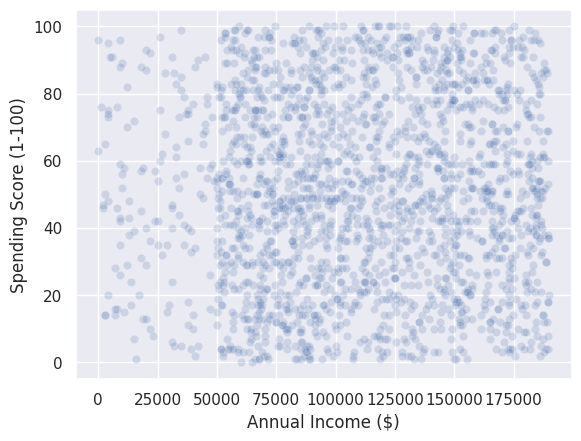

In [33]:
sns.scatterplot(
    data=customers,
    x='Annual Income ($)',
    y='Spending Score (1-100)',
    alpha=1/5,
    )
plt.show()

In [31]:
customers.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


# Conclusion
### This dataset was populatied randomly, so it will make no sense to continue this analysis